<a href="https://colab.research.google.com/github/fiorellaperez1/DesercionEstudiantil/blob/main/DesercionEstudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Intalación de librerias
!pip install pyspark
!pip install pandas

In [ ]:
#Importacion de librerias
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential,layers
import os
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
#Iniciando sesión con spark
sc = pyspark.SparkContext()
spark = SparkSession.builder.getOrCreate()
sc._conf.getAll()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-3-c8421c7eb3b4>:2 

In [ ]:
#Importar desde el drive el excel de Desercion Estudiantil
drive.mount("/content/drive",force_remount=True)
path="/content/drive/MyDrive/Ciclo 7/BI/BI_2024_0_Pregunta_2.xlsx"

Mounted at /content/drive


In [ ]:
#Previsualización de las preguntas y respuestas de la encuesta
df_desercion=pd.read_excel(path,sheet_name=0)
df_desercion.head(51)

,Marca temporal,Nombres y apellidos completos,Edad,Sexo,Código,Escuela Académico Profesional,Ciclo al que perteneces,1. ¿Qué tan satisfecho estás actualmente con tu experiencia en la FISI?,2. ¿Qué dificultades has enfrentado durante tu tiempo como estudiante en la FISI? (Escoge las 3 más relevantes),3. ¿Con qué frecuencia tiene interacciones cordiales con sus compañeros?,...,6. ¿Con qué frecuencia financias tus estudios con recursos propios?,7. ¿Con qué frecuencia tu familia te ayuda a financiar tus estudios?,8. ¿Has considerado abandonar tus estudios en la FISI?,9. ¿Cuál es la principal razón por la que ha considerado abandonar sus estudios en la FISI?,10. ¿En qué medida la falta de dinero ha sido un factor para considerar la posibilidad de desertar de tus estudios?,11. ¿Crees que las tareas y evaluaciones han sido justas y representativas de tus conocimientos y habilidades en la carrera?,12. ¿En qué medida crees que el personal docente y administrativo ha sido receptivo a tus necesidades y preocupaciones académicas?,13. ¿Consideras que los trabajos y evaluaciones asignados te han ayudado a mejorar tu desempeño académico?,14. ¿Cómo calificaría su nivel de motivación y compromiso con sus estudios durante su tiempo en la carrera?,15. ¿Ha experimentado dificultades personales o emocionales que hayan interferido con su compromiso académico?
0,2024-02-24 17:15:20.928,Joslenys Freites,21 - 25 años,Femenino,21200048,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Neutral,"Dificultades económicas, Falta de apoyo académ...",Casi siempre,...,Casi siempre,Siempre,Casi siempre,Problemas académicos,Nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"Sí, algunas veces"
1,2024-02-24 17:15:35.586,Fiorella Flor Pérez Gamboa,21 - 25 años,Femenino,21200084,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Neutral,"Dificultades económicas, Problemas de adaptaci...",Casi siempre,...,Casi siempre,Casi siempre,Nunca,Ninguno,Casi nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"Sí, algunas veces"
2,2024-02-24 17:20:51.866,Jose Ignacio Jara Nuñez,21 - 25 años,Masculino,20200043,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Neutral,Problemas de adaptación académica,Casi nunca,...,Casi siempre,Casi nunca,Casi siempre,Problemas académicos,Casi nunca,No justas ni representativas en absoluto,Poco receptivo,Casi nunca,Bajo,"Sí, algunas veces"
3,2024-02-24 17:24:03.581,Alejandro Felix Pariona Malasquez,21 - 25 años,Masculino,21200013,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Insatisfecho,"Dificultades económicas, Problemas de adaptaci...",Casi siempre,...,Siempre,Casi siempre,Casi siempre,Problemas de salud mental,Casi nunca,Menos justas y representativas,Poco receptivo,Casi nunca,Muy bajo,"Sí, muy a menudo"
4,2024-02-24 17:29:45.592,Harold Enrique Quillca Fernandez,21 - 25 años,Masculino,21200081,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,Satisfecho,"Dificultades económicas, Conflictos personales",Siempre,...,Casi nunca,Casi siempre,Casi nunca,Problemas personales o familiares,Nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"Sí, algunas veces"
5,2024-02-24 17:34:57.588,Rosa Cecilia Calderon Quintana,Menor a 20,Femenino,21200144,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Satisfecho,"Dificultades económicas, Conflictos personales...",Siempre,...,Casi nunca,Casi siempre,Nunca,Ninguno,Casi nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Muy alto,"Sí, algunas veces"
6,2024-02-24 17:37:59.726,María Alejandra Dioses Martínez,21 - 25 años,Femenino,21200115,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Satisfecho,"Dificultades económicas, Falta de apoyo académ...",Siempre,...,Casi nunca,Siempre,Nunca,Ninguno,Casi nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"No, raramente"
7,2024-02-24 17:38:45.461,Carolina Isabel Seminario Valdivia,21 - 25 años,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Información de los datos
df_desercion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                                              --------------  -----         
 0   Marca temporal                                                                                                                      51 non-null     datetime64[ns]
 1   Nombres y apellidos completos                                                                                                       51 non-null     object        
 2   Edad                                                                                                                                51 non-null     object        
 3   Sexo                                                

In [ ]:
#Eliminamos "Marca temporal" ya que es un dato irrelavanta para esta investigación
columnas_a_eliminar = ['Marca temporal']
df_desercion = df_desercion.drop(columns=columnas_a_eliminar)

In [ ]:
#Mostramos la nueva tabla despues de la elimnación de una columna
df_desercion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                              --------------  ----- 
 0   Nombres y apellidos completos                                                                                                       51 non-null     object
 1   Edad                                                                                                                                51 non-null     object
 2   Sexo                                                                                                                                51 non-null     object
 3   Código                                                                                      

In [ ]:
#Cambiamos los nombres de las columnas para hacer más fácil el uso de estas
nombres_nuevos = {'Nombres y apellidos completos  ': 'Nombre ',
                  'Escuela Académico Profesional': 'E.A.P',
                  'Código':'Codigo',
                  'Ciclo al que perteneces':'Ciclo',
                  '1. ¿Qué tan satisfecho estás actualmente con tu experiencia en la FISI?':'Experiencia en la FISI',
                  '2. ¿Qué dificultades has enfrentado durante tu tiempo como estudiante en la FISI? (Escoge las 3 más relevantes) ':'Dificultades',
                  '3. ¿Con qué frecuencia tiene interacciones cordiales con sus compañeros?':'Interacciones con compañeros',
                  '4. ¿Con qué frecuencia tiene interacciones cordiales con los docentes?':'Interacciones con profesores',
                  '5. ¿Con qué frecuencia tiene la posibilidad de elegir su horario de estudio?':'Posibilidad de eleccion de horario',
                  '6. ¿Con qué frecuencia financias tus estudios con recursos propios?':'Frecuencia de financiamiento de recursos propios',
                  '7. ¿Con qué frecuencia tu familia te ayuda a financiar tus estudios?':'Frecuencia de financiamiento departe de tu familia',
                  '8. ¿Has considerado abandonar tus estudios en la FISI? ':'Abandono de la FISI',
                  '9. ¿Cuál es la principal razón por la que ha considerado abandonar sus estudios en la FISI?':'Principales razones para abandonar la FISI',
                  '10. ¿En qué medida la falta de dinero ha sido un factor para considerar la posibilidad de desertar de tus estudios?':'Falta de dinero influyendo en la desercion de los estudios',
                  '11. ¿Crees que las tareas y evaluaciones han sido justas y representativas de tus conocimientos y habilidades en la carrera?':'Evaluciones justas',
                  '12. ¿En qué medida crees que el personal docente y administrativo ha sido receptivo a tus necesidades y preocupaciones académicas?':'Recepcion de necesidades',
                  '13. ¿Consideras que los trabajos y evaluaciones asignados te han ayudado a mejorar tu desempeño académico?':'Mejoramiento de desempeño con trabajos',
                  '14.  ¿Cómo calificaría su nivel de motivación y compromiso con sus estudios durante su tiempo en la carrera?':'Nivel de motivacion y compromiso',
                  '15.  ¿Ha experimentado dificultades personales o emocionales que hayan interferido con su compromiso académico?':'Dificultades personales o emocionales',
                }
df_desercion = df_desercion.rename(columns=nombres_nuevos)

In [ ]:
#Mostramos la tabla despues de los cambios de los las columnas
df_desercion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Nombres y apellidos completos                               51 non-null     object
 1   Edad                                                        51 non-null     object
 2   Sexo                                                        51 non-null     object
 3   Codigo                                                      51 non-null     object
 4   E.A.P                                                       51 non-null     object
 5   Ciclo                                                       51 non-null     object
 6   Experiencia en la FISI                                      51 non-null     object
 7   Dificultades                                                51 non-null     object
 8   Interaccione

In [ ]:
#Mostramos la nueva tabla con las respuestas
df_desercion.head(51)

,Nombres y apellidos completos,Edad,Sexo,Codigo,E.A.P,Ciclo,Experiencia en la FISI,Dificultades,Interacciones con compañeros,Interacciones con profesores,...,Frecuencia de financiamiento de recursos propios,Frecuencia de financiamiento departe de tu familia,Abandono de la FISI,Principales razones para abandonar la FISI,Falta de dinero influyendo en la desercion de los estudios,Evaluciones justas,Recepcion de necesidades,Mejoramiento de desempeño con trabajos,Nivel de motivacion y compromiso,Dificultades personales o emocionales
0,Joslenys Freites,21 - 25 años,Femenino,21200048,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Neutral,"Dificultades económicas, Falta de apoyo académ...",Casi siempre,Casi siempre,...,Casi siempre,Siempre,Casi siempre,Problemas académicos,Nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"Sí, algunas veces"
1,Fiorella Flor Pérez Gamboa,21 - 25 años,Femenino,21200084,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Neutral,"Dificultades económicas, Problemas de adaptaci...",Casi siempre,Casi siempre,...,Casi siempre,Casi siempre,Nunca,Ninguno,Casi nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"Sí, algunas veces"
2,Jose Ignacio Jara Nuñez,21 - 25 años,Masculino,20200043,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Neutral,Problemas de adaptación académica,Casi nunca,Casi nunca,...,Casi siempre,Casi nunca,Casi siempre,Problemas académicos,Casi nunca,No justas ni representativas en absoluto,Poco receptivo,Casi nunca,Bajo,"Sí, algunas veces"
3,Alejandro Felix Pariona Malasquez,21 - 25 años,Masculino,21200013,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Insatisfecho,"Dificultades económicas, Problemas de adaptaci...",Casi siempre,Casi nunca,...,Siempre,Casi siempre,Casi siempre,Problemas de salud mental,Casi nunca,Menos justas y representativas,Poco receptivo,Casi nunca,Muy bajo,"Sí, muy a menudo"
4,Harold Enrique Quillca Fernandez,21 - 25 años,Masculino,21200081,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,Satisfecho,"Dificultades económicas, Conflictos personales",Siempre,Casi nunca,...,Casi nunca,Casi siempre,Casi nunca,Problemas personales o familiares,Nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"Sí, algunas veces"
5,Rosa Cecilia Calderon Quintana,Menor a 20,Femenino,21200144,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Satisfecho,"Dificultades económicas, Conflictos personales...",Siempre,Casi siempre,...,Casi nunca,Casi siempre,Nunca,Ninguno,Casi nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Muy alto,"Sí, algunas veces"
6,María Alejandra Dioses Martínez,21 - 25 años,Femenino,21200115,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Satisfecho,"Dificultades económicas, Falta de apoyo académ...",Siempre,Casi siempre,...,Casi nunca,Siempre,Nunca,Ninguno,Casi nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"No, raramente"
7,Carolina Isabel Seminario Valdivia,21 - 25 años,Femenino,20200234,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,Satisfecho,"Dificultades económicas, Conflictos personales...",Casi siempre,Siempre,...,Casi nunca,Casi siempre,Casi nunca,Problemas financieros,Casi siempre,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"Sí, algunas veces"
8,Kevin Jair Pineda Silupu,21 - 25 años,Masculino,21200174,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,Muy satisfecho,"Dificultades económicas, Falta de apoyo académ...",Siempre,Siempre,...,Siempre,Casi siempre,Nunca,Ninguno,Casi nunca,Mayormente justas y representativas,Receptivo en su mayoría,Casi siempre,Moderado,"No, nunca"
9,Fernando Manuel Azpilcueta Pejerrey,21 - 25 años,Masculino,18200006,Escuela de Ingeniería de Sistemas,9no - 10mo ciclo,Neutral,"Problemas de adaptación académica, Falta de ap...",Siempre,Casi siempre,...,Casi siempre,Casi nunca,Nunca,Ninguno,Nunca,Menos justas y repr

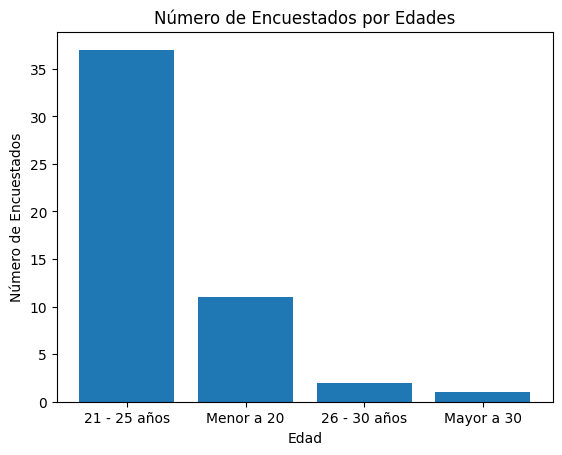

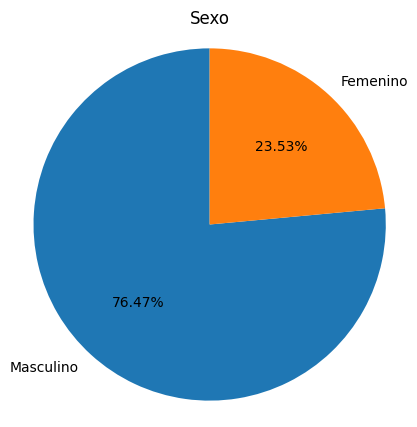

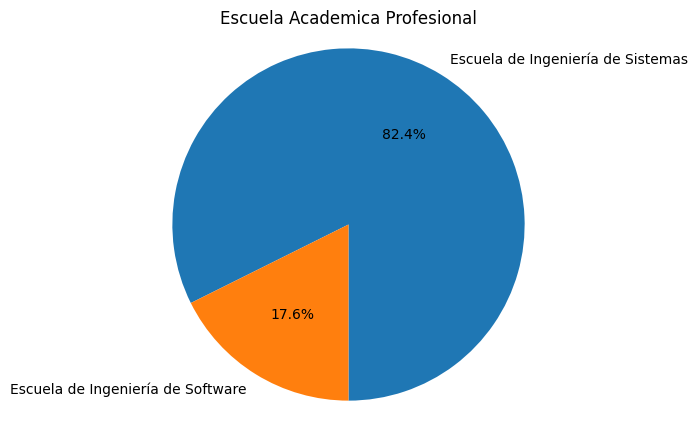

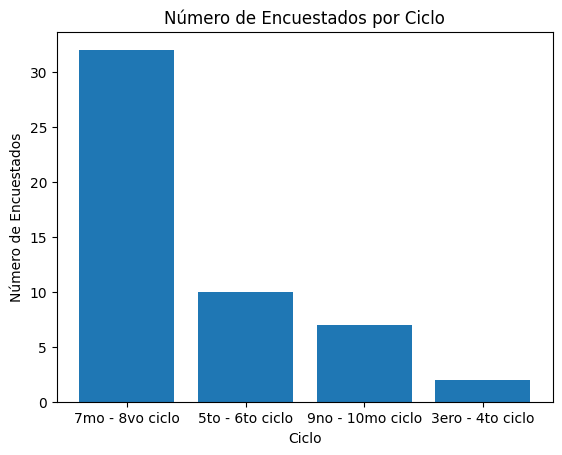

In [ ]:
#Gráficos sobre los encuestados
#Por edad
conteo_Edad = df_desercion['Edad'].value_counts()
plt.bar(conteo_Edad.index, conteo_Edad.values)
plt.xlabel('Edad')
plt.ylabel('Número de Encuestados')
plt.title('Número de Encuestados por Edades')
plt.show()
#Por sexo
conteo_Sexo = df_desercion['Sexo'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(conteo_Sexo, labels=conteo_Sexo.index, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Sexo')
plt.show()
#Por escuela
conteo_Escuela = df_desercion['E.A.P'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(conteo_Escuela, labels=conteo_Escuela.index, autopct='%1.1f%%', startangle=270)
plt.axis('equal')
plt.title('Escuela Academica Profesional')
plt.show()
#Por ciclo
conteo_Ciclo = df_desercion['Ciclo'].value_counts()
plt.bar(conteo_Ciclo.index, conteo_Ciclo.values)
plt.xlabel('Ciclo')
plt.ylabel('Número de Encuestados')
plt.title('Número de Encuestados por Ciclo')
plt.show()

In [ ]:
#Se reemplazaran las respuestas siempre, casi siempre, casi nunca y nunca por 1, 2, 3 y 4.
df_desercion.replace({'Siempre': 4, 'Casi siempre': 3, 'Casi nunca':2, 'Nunca':1}, inplace=True)
df_desercion.replace({'Muy satisfecho': 5, 'Satisfecho': 4, 'Neutral':3, 'Insatisfecho':2, 'Muy insatisfecho':1}, inplace=True)
df_desercion.replace({'Problemas financieros': 1, 'Problemas de salud mental': 1, 'Problemas personales o familiares':1, 'Problemas académicos':1, 'Ninguno':0}, inplace=True)
df_desercion.replace({'Totalmente justas y representativas': 4, 'Mayormente justas y representativas': 3, 'Menos justas y representativas':2, 'No justas ni representativas en absoluto':1}, inplace=True)
df_desercion.replace({'Muy receptivo': 4, 'Receptivo en su mayoría': 3, 'Poco receptivo':2, 'No receptivo en absoluto':1}, inplace=True)
df_desercion.replace({'Muy alto': 4, 'Moderado': 3, 'Bajo':2, 'Muy bajo':1}, inplace=True)
df_desercion.replace({'Sí, muy a menudo': 4, 'Sí, algunas veces': 3, 'No, raramente':2, 'No, nunca':1}, inplace=True)

In [ ]:
#Mostramos los nuevos valores de la tabla
df_desercion.head(51)

,Nombres y apellidos completos,Edad,Sexo,Codigo,E.A.P,Ciclo,Experiencia en la FISI,Dificultades,Interacciones con compañeros,Interacciones con profesores,...,Frecuencia de financiamiento de recursos propios,Frecuencia de financiamiento departe de tu familia,Abandono de la FISI,Principales razones para abandonar la FISI,Falta de dinero influyendo en la desercion de los estudios,Evaluciones justas,Recepcion de necesidades,Mejoramiento de desempeño con trabajos,Nivel de motivacion y compromiso,Dificultades personales o emocionales
0,Joslenys Freites,21 - 25 años,Femenino,21200048,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Falta de apoyo académ...",3,3,...,3,4,3,1,1,3,3,3,3,3
1,Fiorella Flor Pérez Gamboa,21 - 25 años,Femenino,21200084,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Problemas de adaptaci...",3,3,...,3,3,1,0,2,3,3,3,3,3
2,Jose Ignacio Jara Nuñez,21 - 25 años,Masculino,20200043,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,Problemas de adaptación académica,2,2,...,3,2,3,1,2,1,2,2,2,3
3,Alejandro Felix Pariona Malasquez,21 - 25 años,Masculino,21200013,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,2,"Dificultades económicas, Problemas de adaptaci...",3,2,...,4,3,3,1,2,2,2,2,1,4
4,Harold Enrique Quillca Fernandez,21 - 25 años,Masculino,21200081,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales",4,2,...,2,3,2,1,1,3,3,3,3,3
5,Rosa Cecilia Calderon Quintana,Menor a 20,Femenino,21200144,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Conflictos personales...",4,3,...,2,3,1,0,2,3,3,3,4,3
6,María Alejandra Dioses Martínez,21 - 25 años,Femenino,21200115,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Falta de apoyo académ...",4,3,...,2,4,1,0,2,3,3,3,3,2
7,Carolina Isabel Seminario Valdivia,21 - 25 años,Femenino,20200234,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales...",3,4,...,2,3,2,1,3,3,3,3,3,3
8,Kevin Jair Pineda Silupu,21 - 25 años,Masculino,21200174,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,5,"Dificultades económicas, Falta de apoyo académ...",4,4,...,4,3,1,0,2,3,3,3,3,1
9,Fernando Manuel Azpilcueta Pejerrey,21 - 25 años,Masculino,18200006,Escuela de Ingeniería de Sistemas,9no - 10mo ciclo,3,"Problemas de adaptación académica, Falta de ap...",4,3,...,3,2,1,0,1,2,2,3,3,3


In [ ]:
#Creamos columnas nuevas para hacer el calculo más entendible y preciso
columnas_nue1=['Interacciones con compañeros','Interacciones con profesores', 'Experiencia en la FISI']
columnas_nue2=['Frecuencia de financiamiento de recursos propios','Frecuencia de financiamiento departe de tu familia']
columnas_nue3=['Abandono de la FISI','Principales razones para abandonar la FISI', 'Falta de dinero influyendo en la desercion de los estudios']
columnas_nue4=['Evaluciones justas','Recepcion de necesidades', 'Mejoramiento de desempeño con trabajos']
df_desercion['Nivel de comunicacion'] = df_desercion[columnas_nue1].sum(axis=1)
df_desercion['Frecuencia de financiamiento'] = df_desercion[columnas_nue2].sum(axis=1)
df_desercion['Nivel de abandono'] = df_desercion[columnas_nue3].sum(axis=1)
df_desercion['Nivel de desempeño'] = df_desercion[columnas_nue4].sum(axis=1)
df_desercion['Nivel de motivacion'] = df_desercion['Nivel de motivacion y compromiso'] - df_desercion['Dificultades personales o emocionales']

In [ ]:
#Mostramos de nuevo la tabla con las nuevas columnas
df_desercion.head(51)

,Nombres y apellidos completos,Edad,Sexo,Codigo,E.A.P,Ciclo,Experiencia en la FISI,Dificultades,Interacciones con compañeros,Interacciones con profesores,...,Evaluciones justas,Recepcion de necesidades,Mejoramiento de desempeño con trabajos,Nivel de motivacion y compromiso,Dificultades personales o emocionales,Nivel de comunicacion,Frecuencia de financiamiento,Nivel de abandono,Nivel de desempeño,Nivel de motivacion
0,Joslenys Freites,21 - 25 años,Femenino,21200048,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Falta de apoyo académ...",3,3,...,3,3,3,3,3,9,7,5,9,0
1,Fiorella Flor Pérez Gamboa,21 - 25 años,Femenino,21200084,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Problemas de adaptaci...",3,3,...,3,3,3,3,3,9,6,3,9,0
2,Jose Ignacio Jara Nuñez,21 - 25 años,Masculino,20200043,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,Problemas de adaptación académica,2,2,...,1,2,2,2,3,7,5,6,5,-1
3,Alejandro Felix Pariona Malasquez,21 - 25 años,Masculino,21200013,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,2,"Dificultades económicas, Problemas de adaptaci...",3,2,...,2,2,2,1,4,7,7,6,6,-3
4,Harold Enrique Quillca Fernandez,21 - 25 años,Masculino,21200081,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales",4,2,...,3,3,3,3,3,10,5,4,9,0
5,Rosa Cecilia Calderon Quintana,Menor a 20,Femenino,21200144,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Conflictos personales...",4,3,...,3,3,3,4,3,11,5,3,9,1
6,María Alejandra Dioses Martínez,21 - 25 años,Femenino,21200115,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Falta de apoyo académ...",4,3,...,3,3,3,3,2,11,6,3,9,1
7,Carolina Isabel Seminario Valdivia,21 - 25 años,Femenino,20200234,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales...",3,4,...,3,3,3,3,3,11,5,6,9,0
8,Kevin Jair Pineda Silupu,21 - 25 años,Masculino,21200174,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,5,"Dificultades económicas, Falta de apoyo académ...",4,4,...,3,3,3,3,1,13,7,3,9,2
9,Fernando Manuel Azpilcueta Pejerrey,21 - 25 años,Masculino,18200006,Escuela de Ingeniería de Sistemas,9no - 10mo ciclo,3,"Problemas de adaptación académica, Falta de ap...",4,3,...,2,2,3,3,3,10,5,2,7,0


In [ ]:
#Columnas que usaremos para los calculos
columnas_calculospositivos = ['Nivel de comunicacion', 'Frecuencia de financiamiento', 'Nivel de desempeño', 'Nivel de motivacion']
columnas_calculosnegativos = ['Nivel de abandono']
df_desercion['Nivel de desercion'] = df_desercion[columnas_calculospositivos].sum(axis=1) - df_desercion[columnas_calculosnegativos].sum(axis=1)
df_desercion.head(51)

,Nombres y apellidos completos,Edad,Sexo,Codigo,E.A.P,Ciclo,Experiencia en la FISI,Dificultades,Interacciones con compañeros,Interacciones con profesores,...,Recepcion de necesidades,Mejoramiento de desempeño con trabajos,Nivel de motivacion y compromiso,Dificultades personales o emocionales,Nivel de comunicacion,Frecuencia de financiamiento,Nivel de abandono,Nivel de desempeño,Nivel de motivacion,Nivel de desercion
0,Joslenys Freites,21 - 25 años,Femenino,21200048,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Falta de apoyo académ...",3,3,...,3,3,3,3,9,7,5,9,0,20
1,Fiorella Flor Pérez Gamboa,21 - 25 años,Femenino,21200084,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Problemas de adaptaci...",3,3,...,3,3,3,3,9,6,3,9,0,21
2,Jose Ignacio Jara Nuñez,21 - 25 años,Masculino,20200043,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,Problemas de adaptación académica,2,2,...,2,2,2,3,7,5,6,5,-1,10
3,Alejandro Felix Pariona Malasquez,21 - 25 años,Masculino,21200013,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,2,"Dificultades económicas, Problemas de adaptaci...",3,2,...,2,2,1,4,7,7,6,6,-3,11
4,Harold Enrique Quillca Fernandez,21 - 25 años,Masculino,21200081,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales",4,2,...,3,3,3,3,10,5,4,9,0,20
5,Rosa Cecilia Calderon Quintana,Menor a 20,Femenino,21200144,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Conflictos personales...",4,3,...,3,3,4,3,11,5,3,9,1,23
6,María Alejandra Dioses Martínez,21 - 25 años,Femenino,21200115,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Falta de apoyo académ...",4,3,...,3,3,3,2,11,6,3,9,1,24
7,Carolina Isabel Seminario Valdivia,21 - 25 años,Femenino,20200234,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales...",3,4,...,3,3,3,3,11,5,6,9,0,19
8,Kevin Jair Pineda Silupu,21 - 25 años,Masculino,21200174,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,5,"Dificultades económicas, Falta de apoyo académ...",4,4,...,3,3,3,1,13,7,3,9,2,28
9,Fernando Manuel Azpilcueta Pejerrey,21 - 25 años,Masculino,18200006,Escuela de Ingeniería de Sistemas,9no - 10mo ciclo,3,"Problemas de adaptación académica, Falta de ap...",4,3,...,2,3,3,3,10,5,2,7,0,20


In [ ]:
#Agregar clumna con condiciones para el nivel de Disercion
condicion = df_desercion['Nivel de desercion'] >= 20
et_si = 1000
et_no = 500
df_desercion['Desercion'] = np.where(condicion, et_si, et_no)

In [ ]:
#Mostramos la tabla con la nueva columna y sus valores
df_desercion.head(51)

,Nombres y apellidos completos,Edad,Sexo,Codigo,E.A.P,Ciclo,Experiencia en la FISI,Dificultades,Interacciones con compañeros,Interacciones con profesores,...,Mejoramiento de desempeño con trabajos,Nivel de motivacion y compromiso,Dificultades personales o emocionales,Nivel de comunicacion,Frecuencia de financiamiento,Nivel de abandono,Nivel de desempeño,Nivel de motivacion,Nivel de desercion,Desercion
0,Joslenys Freites,21 - 25 años,Femenino,21200048,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Falta de apoyo académ...",3,3,...,3,3,3,9,7,5,9,0,20,1000
1,Fiorella Flor Pérez Gamboa,21 - 25 años,Femenino,21200084,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Problemas de adaptaci...",3,3,...,3,3,3,9,6,3,9,0,21,1000
2,Jose Ignacio Jara Nuñez,21 - 25 años,Masculino,20200043,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,Problemas de adaptación académica,2,2,...,2,2,3,7,5,6,5,-1,10,500
3,Alejandro Felix Pariona Malasquez,21 - 25 años,Masculino,21200013,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,2,"Dificultades económicas, Problemas de adaptaci...",3,2,...,2,1,4,7,7,6,6,-3,11,500
4,Harold Enrique Quillca Fernandez,21 - 25 años,Masculino,21200081,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales",4,2,...,3,3,3,10,5,4,9,0,20,1000
5,Rosa Cecilia Calderon Quintana,Menor a 20,Femenino,21200144,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Conflictos personales...",4,3,...,3,4,3,11,5,3,9,1,23,1000
6,María Alejandra Dioses Martínez,21 - 25 años,Femenino,21200115,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Falta de apoyo académ...",4,3,...,3,3,2,11,6,3,9,1,24,1000
7,Carolina Isabel Seminario Valdivia,21 - 25 años,Femenino,20200234,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales...",3,4,...,3,3,3,11,5,6,9,0,19,500
8,Kevin Jair Pineda Silupu,21 - 25 años,Masculino,21200174,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,5,"Dificultades económicas, Falta de apoyo académ...",4,4,...,3,3,1,13,7,3,9,2,28,1000
9,Fernando Manuel Azpilcueta Pejerrey,21 - 25 años,Masculino,18200006,Escuela de Ingeniería de Sistemas,9no - 10mo ciclo,3,"Problemas de adaptación académica, Falta de ap...",4,3,...,3,3,3,10,5,2,7,0,20,1000


In [ ]:
#Guardamos los datos en un nuevo excel para el analisis respectivo
destino = '/content/drive/MyDrive/Ciclo 7/BI/Resultados_desercion(analisis).xlsx'
df_desercion.to_excel(destino, index=False)

print(f"Se guardó correctamente en el excel: '{destino}'.")

Se guardó correctamente en el excel: '/content/drive/MyDrive/Ciclo 7/BI/Resultados_desercion(analisis).xlsx'.


In [ ]:
#Eliminamos las columnas que creamos
columnas_a_eliminar = ['Nivel de comunicacion', 'Frecuencia de financiamiento', 'Nivel de abandono', 'Nivel de desempeño', 'Nivel de motivacion', 'Nivel de desercion']
df_desercion = df_desercion.drop(columns=columnas_a_eliminar)

In [ ]:
#Cambiamos los 1 y 0 de la columna desercion para el analisis de regresion logistica
df_desercion.replace({ 1000 :'No', 500: 'Si'}, inplace=True)

In [ ]:
#Se muestra de nuevo la tabla inicial
df_desercion.head(51)

,Nombres y apellidos completos,Edad,Sexo,Codigo,E.A.P,Ciclo,Experiencia en la FISI,Dificultades,Interacciones con compañeros,Interacciones con profesores,...,Frecuencia de financiamiento departe de tu familia,Abandono de la FISI,Principales razones para abandonar la FISI,Falta de dinero influyendo en la desercion de los estudios,Evaluciones justas,Recepcion de necesidades,Mejoramiento de desempeño con trabajos,Nivel de motivacion y compromiso,Dificultades personales o emocionales,Desercion
0,Joslenys Freites,21 - 25 años,Femenino,21200048,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Falta de apoyo académ...",3,3,...,4,3,1,1,3,3,3,3,3,No
1,Fiorella Flor Pérez Gamboa,21 - 25 años,Femenino,21200084,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,"Dificultades económicas, Problemas de adaptaci...",3,3,...,3,1,0,2,3,3,3,3,3,No
2,Jose Ignacio Jara Nuñez,21 - 25 años,Masculino,20200043,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,3,Problemas de adaptación académica,2,2,...,2,3,1,2,1,2,2,2,3,Si
3,Alejandro Felix Pariona Malasquez,21 - 25 años,Masculino,21200013,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,2,"Dificultades económicas, Problemas de adaptaci...",3,2,...,3,3,1,2,2,2,2,1,4,Si
4,Harold Enrique Quillca Fernandez,21 - 25 años,Masculino,21200081,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales",4,2,...,3,2,1,1,3,3,3,3,3,No
5,Rosa Cecilia Calderon Quintana,Menor a 20,Femenino,21200144,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Conflictos personales...",4,3,...,3,1,0,2,3,3,3,4,3,No
6,María Alejandra Dioses Martínez,21 - 25 años,Femenino,21200115,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,4,"Dificultades económicas, Falta de apoyo académ...",4,3,...,4,1,0,2,3,3,3,3,2,No
7,Carolina Isabel Seminario Valdivia,21 - 25 años,Femenino,20200234,Escuela de Ingeniería de Sistemas,5to - 6to ciclo,4,"Dificultades económicas, Conflictos personales...",3,4,...,3,2,1,3,3,3,3,3,3,Si
8,Kevin Jair Pineda Silupu,21 - 25 años,Masculino,21200174,Escuela de Ingeniería de Sistemas,7mo - 8vo ciclo,5,"Dificultades económicas, Falta de apoyo académ...",4,4,...,3,1,0,2,3,3,3,3,1,No
9,Fernando Manuel Azpilcueta Pejerrey,21 - 25 años,Masculino,18200006,Escuela de Ingeniería de Sistemas,9no - 10mo ciclo,3,"Problemas de adaptación académica, Falta de ap...",4,3,...,2,1,0,1,2,2,3,3,3,No


In [ ]:
destino2 = '/content/drive/MyDrive/Ciclo 7/BI/Resultados_desercion(analisis).xlsx'
df_desercion.to_excel(destino2, index=False)

print(f"Se guardó correctamente en el excel: '{destino2}'.")

Se guardó correctamente en el excel: '/content/drive/MyDrive/Ciclo 7/BI/Resultados_desercion(analisis).xlsx'.


In [ ]:
#Prediccion con RL
#Cargamos el archivo excel antes guardado
path="/content/drive/MyDrive/Desercion Estudiantil/Resultados_desercion(RL).xlsx"
df_tabla=pd.read_excel(path,sheet_name=0)
df_tabla.head(51)

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/Ciclo 7/BI'

In [ ]:
#Eliminamos las filas que son irrelevantes para el calculo de la prediccion
columnas_a_eliminar = ['Nombres y apellidos completos', 'Edad','Sexo','Codigo', 'E.A.P', 'Ciclo']
df_prediccion = df_tabla.drop(columns=columnas_a_eliminar)

In [ ]:
#Transformamos a dummies
df_prediccion=pd.get_dummies(df_prediccion,drop_first=True)
df_prediccion.head(51)

,Experiencia en la FISI,Interacciones con compañeros,Interacciones con profesores,Posibilidad de eleccion de horario,Frecuencia de financiamiento de recursos propios,Frecuencia de financiamiento departe de tu familia,Abandono de la FISI,Principales razones para abandonar la FISI,Falta de dinero influyendo en la desercion de los estudios,Evaluciones justas,...,Dificultades_Falta de apoyo académico por parte de profesores,"Dificultades_Falta de apoyo académico por parte de profesores, Conflictos personales","Dificultades_Falta de apoyo académico por parte de profesores, Conflictos personales, Problemas de salud",Dificultades_Problemas de adaptación académica,"Dificultades_Problemas de adaptación académica, Conflictos personales","Dificultades_Problemas de adaptación académica, Falta de apoyo académico por parte de profesores","Dificultades_Problemas de adaptación académica, Falta de apoyo académico por parte de profesores, Conflictos personales","Dificultades_Problemas de adaptación académica, Falta de apoyo académico por parte de profesores, Problemas de salud","Dificultades_Problemas de adaptación académica, Problemas de salud",Desercion_Si
0,3,3,3,4,3,4,3,1,1,3,...,0,0,0,0,0,0,0,0,0,0
1,3,3,3,4,3,3,1,0,2,3,...,0,0,0,0,0,0,0,0,0,0
2,3,2,2,2,3,2,3,1,2,1,...,0,0,0,1,0,0,0,0,0,1
3,2,3,2,2,4,3,3,1,2,2,...,0,0,0,0,0,0,0,0,0,1
4,4,4,2,3,2,3,2,1,1,3,...,0,0,0,0,0,0,0,0,0,0
5,4,4,3,3,2,3,1,0,2,3,...,0,0,0,0,0,0,0,0,0,0
6,4,4,3,3,2,4,1,0,2,3,...,0,0,0,0,0,0,0,0,0,0
7,4,3,4,3,2,3,2,1,3,3,...,0,0,0,0,0,0,0,0,0,1
8,5,4,4,4,4,3,1,0,2,3,...,0,0,0,0,0,0,0,0,0,0
9,3,4,3,3,3,2,1,0,1,2,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Entrenamiento de las variables
x_train,x_test,y_train,y_test=train_test_split(df_prediccion.drop('Desercion_Si',axis=1),
                                               df_prediccion['Desercion_Si'])
LogReg=LogisticRegression(solver='lbfgs')
LogReg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Definimos la funcion de prediccion
def predecir_rpta(respuesta):
  if respuesta == 0:
    print("El alumno no abandona la carrera")
  else:
    print("El alumno abandona la carrera")

In [ ]:
#Dos ejemplos
respuesta=LogReg.predict(np.array([[4,3,2,1,1,2,3,1,2,3,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]))[0]
predecir_rpta(respuesta)

respuesta1=LogReg.predict(np.array([[2,2,2,2,3,3,3,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))[0]
predecir_rpta(respuesta1)

El alumno abandona la carrera
El alumno abandona la carrera


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


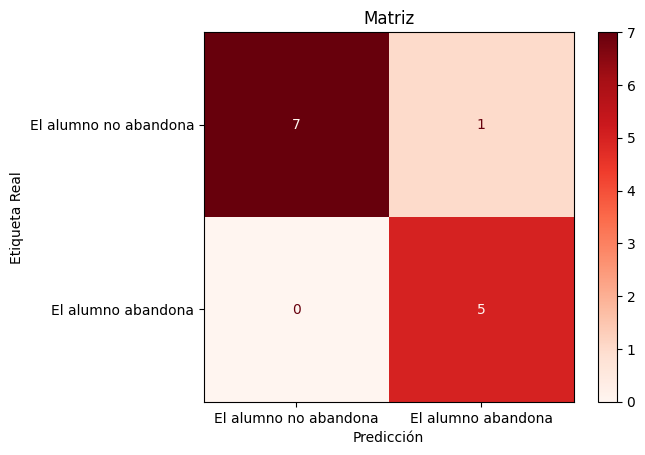

In [ ]:
#Obtenemos la matriz de confusion
predicciones = LogReg.predict(x_test)
matriz_confusion = confusion_matrix(y_test, predicciones)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=["El alumno no abandona", "El alumno abandona"])
disp.plot(cmap=plt.cm.Reds)
plt.title("Matriz")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.show()

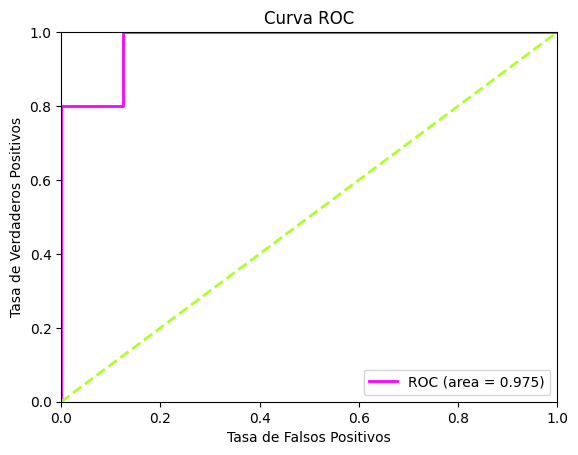

In [ ]:
probs = LogReg.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, umbrales = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='magenta', lw=2, label='ROC (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='greenyellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()